# Notebook de présentation des résultats de notre travail sur l'étude de réinforcement learning

## Présentation rapide

Dans ce notebook, nous allons présenter les résultats que nous avons obtenu à travers un benchmark que nous avons effectuer sur les algorithmes suivants "Q learning", "le Sarsa" et le "Monte-carlo".

Pour chacun des changements des paramètres suivants :

* learning_rate (sauf Monte-carlo)
* epochs
* start_epsilon
* final_epsilon

Nous lançons un entraînement des différents algorithmes avec les différents paramètres.

A la fin de chaque entraînement, nous effectuons 1000 execution de la matrice avec le gymnasium et nous récupérons le nombre de step qu'à mis notre modèle pour fini le jeu.

Nous enregistrons ensuite dans un json les valeurs suivantes : 

* nombre de pas moyen (sur les mille tests)
* le minimum step trouvé parmis les mille tests
* le maximum step trouvé parmis les mille tests
* le temps réel que l'entraînement à mis à finir

Les différents paramètres pour chacun des algorithmes sont : 
* learning_rate : 0.1, 0.01, 0.001
* epochs : 1000, 2500, 5000, 10000, 25000, 50000
* start_epsilon : 3.0, 1.0, 0.5
* final_epsilon : 0.1, 0.01, 0.001, 0

In [1]:
# Import du fichier de résultat
import json
 
# Opening JSON file
with open('benchmark.json') as json_file:
    data = json.load(json_file)

In [2]:
# create Datraframe
import pandas as pd
import seaborn

dataframe_q = pd.DataFrame(data[0])
dataframe_sarsa = pd.DataFrame(data[1])
print(dataframe_q["learning_rate"].unique())
print(dataframe_q["epochs"].unique())
print(dataframe_q["start_epsilon"].unique())
print(dataframe_q["final_epsilon"].unique())

[0.1   0.01  0.001]
[ 1000  2500  5000 10000 25000 50000]
[3.  1.  0.5]
[0.1   0.01  0.001 0.   ]


# Comparaison des résultats en fonction des paramètres.

Tout d'abord, nous allons comparer les résultats que nous avons obtenus en fonction de nos différents paramètres.
Nous allons généré des lignes pour essayer de déduire si des paramètres sont plus importants que d'autres.

## Compare by learning_rate

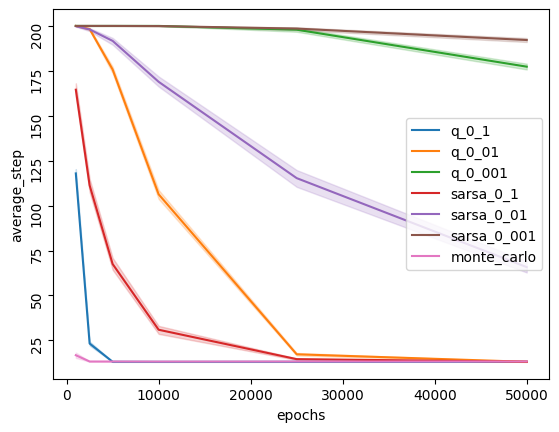

In [3]:
# Compare result by learning rate
q_data_0_1 = []
q_data_0_01 = []
q_data_0_001 = []
for obj in data[0]:
    if obj["learning_rate"] == 0.1:
        q_data_0_1.append(obj)
    if obj["learning_rate"] == 0.01:
        q_data_0_01.append(obj)
    if obj["learning_rate"] == 0.001:
        q_data_0_001.append(obj)

sarsa_data_0_1 = []
sarsa_data_0_01 = []
sarsa_data_0_001 = []
for obj in data[1]:
    if obj["learning_rate"] == 0.1:
        sarsa_data_0_1.append(obj)
    if obj["learning_rate"] == 0.01:
        sarsa_data_0_01.append(obj)
    if obj["learning_rate"] == 0.001:
        sarsa_data_0_001.append(obj)

monte_carlo_data_0_1 = []
monte_carlo_data_0_01 = []
monte_carlo_data_0_001 = []
for obj in data[2]:
    if obj["learning_rate"] == 0.1:
        monte_carlo_data_0_1.append(obj)
    if obj["learning_rate"] == 0.01:
        monte_carlo_data_0_01.append(obj)
    if obj["learning_rate"] == 0.001:
        monte_carlo_data_0_001.append(obj)

seaborn.lineplot(pd.DataFrame(q_data_0_1), x = "epochs", y= "average_step", legend="brief", label="q_0_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_0_01), x = "epochs", y= "average_step", legend="brief", label="q_0_01").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_0_001), x = "epochs", y= "average_step", legend="brief", label="q_0_001").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0_1), x = "epochs", y= "average_step", legend="brief", label="sarsa_0_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0_01), x = "epochs", y= "average_step", legend="brief", label="sarsa_0_01").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0_001), x = "epochs", y= "average_step", legend="brief", label="sarsa_0_001").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_0_1), x = "epochs", y= "average_step", legend="brief", label="monte_carlo").tick_params(axis='y', rotation=90)
#seaborn.lineplot(pd.DataFrame(monte_carlo_data_0_01), x = "epochs", y= "average_step", legend="brief", label="monte_0_01").tick_params(axis='y', rotation=90)
#seaborn.lineplot(pd.DataFrame(monte_carlo_data_0_001), x = "epochs", y= "average_step", legend="brief", label="monte_0_001").tick_params(axis='y', rotation=90)

Dans ce graphique, nous pouvons observé que nous avons obtenu de meilleures résultats avec le paramètre learning_rate set à 0.1. 
Cependant, avec suffisamment d'epoch (ici 25000), l'algorithme Q_learning arrive à avoir de bon résultat avec le learning_rate à 0.01.  

## Compare by Epsilon

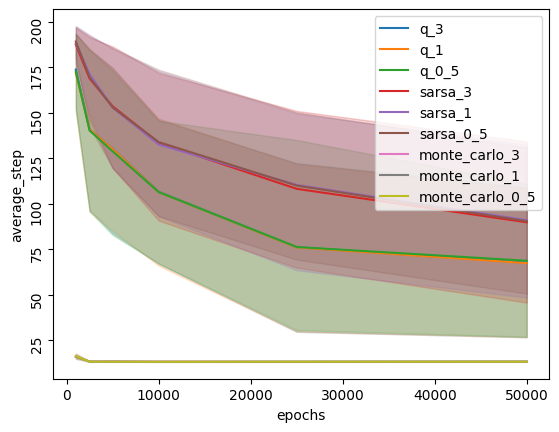

In [4]:
#Compare result by start epsilon
q_data_3 = []
q_data_1 = []
q_data_0_5 = []
for obj in data[0]:
    if obj["start_epsilon"] == 3.0 :
        q_data_3.append(obj)
    if obj["start_epsilon"] == 1.0:
        q_data_1.append(obj)
    if obj["start_epsilon"] == 0.5:
        q_data_0_5.append(obj)
sarsa_data_3 = []
sarsa_data_1 = []
sarsa_data_0_5 = []
for obj in data[1]:
    if obj["start_epsilon"] == 3.0 :
        sarsa_data_3.append(obj)
    if obj["start_epsilon"] == 1.0:
        sarsa_data_1.append(obj)
    if obj["start_epsilon"] == 0.5:
        sarsa_data_0_5.append(obj)

monte_carlo_data_3 = []
monte_carlo_data_1 = []
monte_carlo_data_0_5 = []
for obj in data[2]:
    if obj["start_epsilon"] == 3.0 :
        monte_carlo_data_3.append(obj)
    if obj["start_epsilon"] == 1.0:
        monte_carlo_data_1.append(obj)
    if obj["start_epsilon"] == 0.5:
        monte_carlo_data_0_5.append(obj)
seaborn.lineplot(pd.DataFrame(q_data_3), x = "epochs", y= "average_step", legend="brief", label="q_3").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_1), x = "epochs", y= "average_step", legend="brief", label="q_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_0_5), x = "epochs", y= "average_step", legend="brief", label="q_0_5").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_3), x = "epochs", y= "average_step", legend="brief", label="sarsa_3").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_1), x = "epochs", y= "average_step", legend="brief", label="sarsa_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0_5), x = "epochs", y= "average_step", legend="brief", label="sarsa_0_5").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_3), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_3").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_1), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_0_5), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_0_5").tick_params(axis='y', rotation=90)

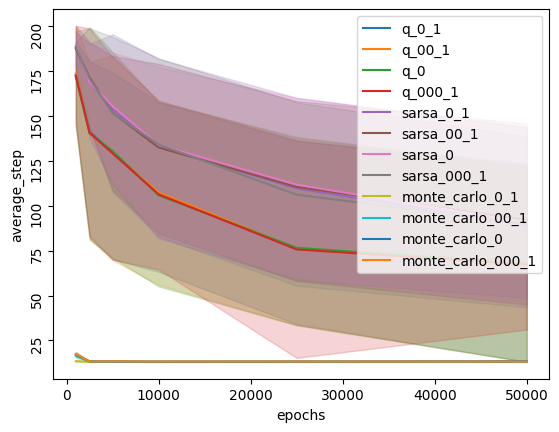

In [5]:
#Compare result by final epsilon
q_data_0_1 = []
q_data_00_1 = []
q_data_0 = []
q_data_000_1 = []
for obj in data[0]:
    if obj["final_epsilon"] == 0.1 :
        q_data_0_1.append(obj)
    if obj["final_epsilon"] == 0.01:
        q_data_00_1.append(obj)
    if obj["final_epsilon"] == 0 :
        q_data_0.append(obj)
    if obj["final_epsilon"] == 0.001:
        q_data_000_1.append(obj)
sarsa_data_0_1 = []
sarsa_data_00_1 = []
sarsa_data_0 = []
sarsa_data_000_1 = []
for obj in data[1]:
    if obj["final_epsilon"] == 0.1 :
        sarsa_data_0_1.append(obj)
    if obj["final_epsilon"] == 0.01:
        sarsa_data_00_1.append(obj)
    if obj["final_epsilon"] == 0 :
        sarsa_data_0.append(obj)
    if obj["final_epsilon"] == 0.001:
        sarsa_data_000_1.append(obj)

monte_carlo_data_0_1 = []
monte_carlo_data_00_1 = []
monte_carlo_data_0 = []
monte_carlo_data_000_1 = []
for obj in data[2]:
    if obj["final_epsilon"] == 0.1 :
        monte_carlo_data_0_1.append(obj)
    if obj["final_epsilon"] == 0.01:
        monte_carlo_data_00_1.append(obj)
    if obj["final_epsilon"] == 0 :
        monte_carlo_data_0.append(obj)
    if obj["final_epsilon"] == 0.001:
        monte_carlo_data_000_1.append(obj)
seaborn.lineplot(pd.DataFrame(q_data_0_1), x = "epochs", y= "average_step", legend="brief", label="q_0_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_00_1), x = "epochs", y= "average_step", legend="brief", label="q_00_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_0), x = "epochs", y= "average_step", legend="brief", label="q_0").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_000_1), x = "epochs", y= "average_step", legend="brief", label="q_000_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0_1), x = "epochs", y= "average_step", legend="brief", label="sarsa_0_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_00_1), x = "epochs", y= "average_step", legend="brief", label="sarsa_00_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_0), x = "epochs", y= "average_step", legend="brief", label="sarsa_0").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_000_1), x = "epochs", y= "average_step", legend="brief", label="sarsa_000_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_0_1), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_0_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_00_1), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_00_1").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_0), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_0").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_000_1), x = "epochs", y= "average_step", legend="brief", label="monte_carlo_000_1").tick_params(axis='y', rotation=90)

Les deux graphiques précemment ne nous apportent pas énormément d'éléments à traiter.
Il est probable que ce choix de graphique n'est pas pertinant pour essayer de déduire des informations sur les paramètres start_epsilon et final_epsilon car les résultats sont brouillés par les différents learning_rate, faussant la moyenne.

Nous pourrons regarder plus en détails ces deux paramètres plus tard dans ce notebook.

De plus, malgrè la modification de ses paramètres au lancement du monte-carlo, il n'y eu aucun changement de ses résultats. Peut-être que nous réduisons la valeur de epsilon trop vite pour voir une différence.

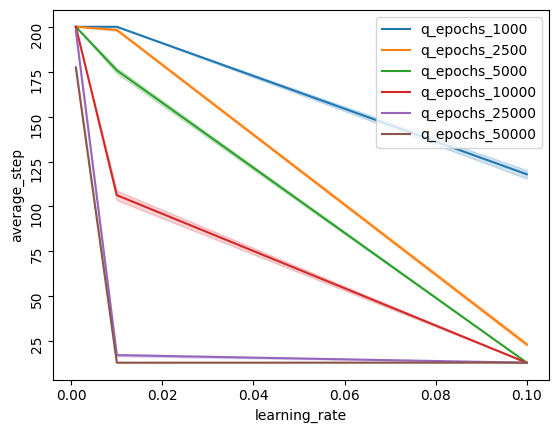

In [6]:
#Compare result by epochs for q learning
q_data_epochs_1000 = []
q_data_epochs_2500 = []
q_data_epochs_5000 = []
q_data_epochs_10000 = []
q_data_epochs_25000 = []
q_data_epochs_50000 = []
for obj in data[0]:
    if obj["epochs"] == 1000:
        q_data_epochs_1000.append(obj)
    if obj["epochs"] == 2500:
        q_data_epochs_2500.append(obj)
    if obj["epochs"] == 5000:
        q_data_epochs_5000.append(obj)
    if obj["epochs"] == 10000:
        q_data_epochs_10000.append(obj)
    if obj["epochs"] == 25000:
        q_data_epochs_25000.append(obj)
    if obj["epochs"] == 50000:
        q_data_epochs_50000.append(obj)
seaborn.lineplot(pd.DataFrame(q_data_epochs_1000), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_1000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_epochs_2500), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_2500").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_epochs_5000), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_5000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_epochs_10000), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_10000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_epochs_25000), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_25000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(q_data_epochs_50000), x = "learning_rate", y= "average_step", legend="brief", label="q_epochs_50000").tick_params(axis='y', rotation=90)


## Compare result by epochs for q learning

Dans ce tableau, nous pouvons remarquer que plus le nombre d'epochs est haut, plus un learning_rate bas sera toléré.
Cepandant, la différence que nous allons retrouver ici est la suivante : ***le temps***

Les deux résultats suivantes sont les deux entrainement ayant eu :
* une moyenne de step pour résoudre le jeu (1000 parties) en dessous de 15 steps.
* avec un maximum de 18 steps pour résoudre un jeu (sur les 1000 parties).
* avec un epoch à 5000 et un epoch à 50000.

{'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.909, 'min_step': 6, 'max_step': 18, 'time': 4.190523624420166}

{'algo': 'q', 'learning_rate': 0.1, 'epochs': 50000, 'start_epsilon': 0.5, 'final_epsilon': 0.001, 'average_step': 13.233, 'min_step': 6, 'max_step': 18, 'time': 22.956276893615723}

Quand on regarde le temps d'entraînement, on peut se rendre compte que l'entraînement réalisé avec 5000 epoch a duré 4 secondes alors que celui réalisé en 50000 step a pris 22 secondes.

Donc même si, un plus grand nombre d'epoch permet d'utiliser un learning_rate plus petit, on se rend compte que la perte de temps au cours de l'entraînement nous permet de comprendre qu'il vaut mieux moins d'epoch avec un learning_rate plus élevé.

## Compare by epochs for SARSA

Dans ce graphique, nous pouvons observer que si nous souhaitons obtenir de bons résultats avec l'algorithme SARSA, il est nécessaire d'utiliser un learning_rate de 0.1 et un minimum de 25000 epochs.

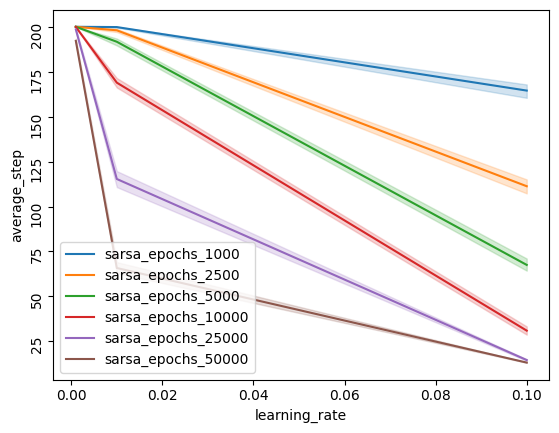

In [7]:
#Compare result by epochs for sarsa learning
sarsa_data_epochs_1000 = []
sarsa_data_epochs_2500 = []
sarsa_data_epochs_5000 = []
sarsa_data_epochs_10000 = []
sarsa_data_epochs_25000 = []
sarsa_data_epochs_50000 = []
for obj in data[1]:
    if obj["epochs"] == 1000:
        sarsa_data_epochs_1000.append(obj)
    if obj["epochs"] == 2500:
        sarsa_data_epochs_2500.append(obj)
    if obj["epochs"] == 5000:
        sarsa_data_epochs_5000.append(obj)
    if obj["epochs"] == 10000:
        sarsa_data_epochs_10000.append(obj)
    if obj["epochs"] == 25000:
        sarsa_data_epochs_25000.append(obj)
    if obj["epochs"] == 50000:
        sarsa_data_epochs_50000.append(obj)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_1000), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_1000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_2500), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_2500").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_5000), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_5000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_10000), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_10000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_25000), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_25000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(sarsa_data_epochs_50000), x = "learning_rate", y= "average_step", legend="brief", label="sarsa_epochs_50000").tick_params(axis='y', rotation=90)

## Compare by epochs for Monte carlo

Dans ce graphique, nous retrouvons les résultats vu précédemment.

Si le réglage de l'epoch à 1000 n'est pas suffisant, dès que l'entrainement dépasse les 2500 epochs les résultats obtiennent de très bons scores.

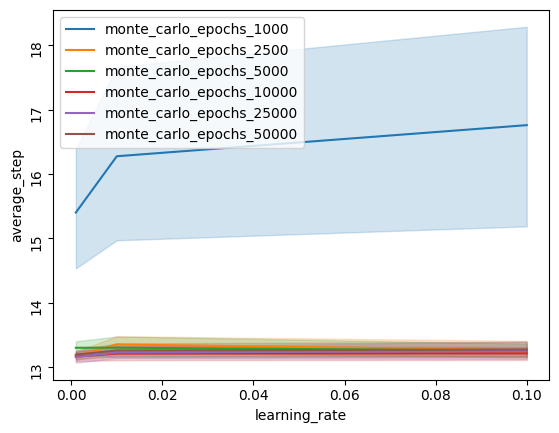

In [8]:
#Compare result by epochs for monte_carlo learning
monte_carlo_data_epochs_1000 = []
monte_carlo_data_epochs_2500 = []
monte_carlo_data_epochs_5000 = []
monte_carlo_data_epochs_10000 = []
monte_carlo_data_epochs_25000 = []
monte_carlo_data_epochs_50000 = []
for obj in data[2]:
    if obj["epochs"] == 1000:
        monte_carlo_data_epochs_1000.append(obj)
    if obj["epochs"] == 2500:
        monte_carlo_data_epochs_2500.append(obj)
    if obj["epochs"] == 5000:
        monte_carlo_data_epochs_5000.append(obj)
    if obj["epochs"] == 10000:
        monte_carlo_data_epochs_10000.append(obj)
    if obj["epochs"] == 25000:
        monte_carlo_data_epochs_25000.append(obj)
    if obj["epochs"] == 50000:
        monte_carlo_data_epochs_50000.append(obj)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_1000), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_1000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_2500), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_2500").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_5000), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_5000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_10000), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_10000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_25000), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_25000").tick_params(axis='y', rotation=90)
seaborn.lineplot(pd.DataFrame(monte_carlo_data_epochs_50000), x = "learning_rate", y= "average_step", legend="brief", label="monte_carlo_epochs_50000").tick_params(axis='y', rotation=90)

In [9]:
# Sort by average_step
data_sorted = data.copy()
data_sorted[0].sort(key=lambda x: x["average_step"])
data_sorted[1].sort(key=lambda x: x["average_step"])
data_sorted[2].sort(key=lambda x: x["average_step"])

for i in range(0, 5):
    print(data_sorted[0][i])
    print(data_sorted[1][i])
    print(data_sorted[2][i])

{'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.909, 'min_step': 6, 'max_step': 18, 'time': 4.190523624420166}
{'algo': 'sarsa', 'learning_rate': 0.1, 'epochs': 50000, 'start_epsilon': 3.0, 'final_epsilon': 0.01, 'average_step': 12.912, 'min_step': 6, 'max_step': 18, 'time': 11.102557897567749}
{'algo': 'monte_carlo', 'learning_rate': 0.1, 'epochs': 10000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.928, 'min_step': 6, 'max_step': 18, 'time': 3.2699294090270996}
{'algo': 'q', 'learning_rate': 0.01, 'epochs': 50000, 'start_epsilon': 1.0, 'final_epsilon': 0.1, 'average_step': 12.938, 'min_step': 6, 'max_step': 18, 'time': 42.47433662414551}
{'algo': 'sarsa', 'learning_rate': 0.1, 'epochs': 50000, 'start_epsilon': 3.0, 'final_epsilon': 0.001, 'average_step': 12.983, 'min_step': 6, 'max_step': 18, 'time': 11.187448263168335}
{'algo': 'monte_carlo', 'learning_rate': 0.001, 'epochs': 25000, 'start_epsilon': 1.0

## Keep all average_step for Q-learning and SARSA below 15 steps

In [10]:
data_clean = data.copy()
data_clean[0] = [x for x in data_clean[0] if x["average_step"] < 15]
data_clean[1] = [x for x in data_clean[1] if x["average_step"] < 15]
data_clean[2] = [x for x in data_clean[2] if x["average_step"] < 15]
print(f"Q-learning: {len(data_clean[0])} on {len(data[0])}")
print(f"SARSA: {len(data_clean[1])} on {len(data[1])}")
print(f"Monte Carlo: {len(data_clean[2])} on {len(data[2])}")
print(data_clean[0])
print(data_clean[1])
print(data_clean[2])

Q-learning: 60 on 216
SARSA: 21 on 216
Monte Carlo: 195 on 216
[{'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.909, 'min_step': 6, 'max_step': 18, 'time': 4.190523624420166}, {'algo': 'q', 'learning_rate': 0.01, 'epochs': 50000, 'start_epsilon': 1.0, 'final_epsilon': 0.1, 'average_step': 12.938, 'min_step': 6, 'max_step': 18, 'time': 42.47433662414551}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 10000, 'start_epsilon': 1.0, 'final_epsilon': 0.1, 'average_step': 12.94, 'min_step': 6, 'max_step': 18, 'time': 6.887800693511963}, {'algo': 'q', 'learning_rate': 0.01, 'epochs': 50000, 'start_epsilon': 0.5, 'final_epsilon': 0.001, 'average_step': 12.96, 'min_step': 6, 'max_step': 18, 'time': 39.490036725997925}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 10000, 'start_epsilon': 0.5, 'final_epsilon': 0.01, 'average_step': 12.992, 'min_step': 6, 'max_step': 18, 'time': 6.376695871353149}, {'algo': 'q', 'learning_rate': 0.1,

## Remove all json with max_step > 20 from data_clean

In [11]:
data_clean[0] = [x for x in data_clean[0] if x["max_step"] <= 18]
data_clean[1] = [x for x in data_clean[1] if x["max_step"] <= 18]
data_clean[2] = [x for x in data_clean[2] if x["max_step"] <= 18]
print(f"Q-learning: {len(data_clean[0])} on {len(data[0])}")
print(f"SARSA: {len(data_clean[1])} on {len(data[1])}")
print(f"Monte Carlo: {len(data_clean[2])} on {len(data[2])}")
print(data_clean[0])
print(data_clean[1])
print(data_clean[2])

Q-learning: 60 on 216
SARSA: 11 on 216
Monte Carlo: 133 on 216
[{'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.909, 'min_step': 6, 'max_step': 18, 'time': 4.190523624420166}, {'algo': 'q', 'learning_rate': 0.01, 'epochs': 50000, 'start_epsilon': 1.0, 'final_epsilon': 0.1, 'average_step': 12.938, 'min_step': 6, 'max_step': 18, 'time': 42.47433662414551}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 10000, 'start_epsilon': 1.0, 'final_epsilon': 0.1, 'average_step': 12.94, 'min_step': 6, 'max_step': 18, 'time': 6.887800693511963}, {'algo': 'q', 'learning_rate': 0.01, 'epochs': 50000, 'start_epsilon': 0.5, 'final_epsilon': 0.001, 'average_step': 12.96, 'min_step': 6, 'max_step': 18, 'time': 39.490036725997925}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 10000, 'start_epsilon': 0.5, 'final_epsilon': 0.01, 'average_step': 12.992, 'min_step': 6, 'max_step': 18, 'time': 6.376695871353149}, {'algo': 'q', 'learning_rate': 0.1,

In [12]:
## Sort data_clean by time

In [30]:
data_clean[0].sort(key=lambda x: x["time"])
data_clean[1].sort(key=lambda x: x["time"])
data_clean[2].sort(key=lambda x: x["time"])
print(data_clean[0])
print(data_clean[1])
print(data_clean[2])

<class 'list'>
[{'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0, 'average_step': 12.909, 'min_step': 6, 'max_step': 18, 'time': 4.190523624420166}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0.001, 'average_step': 13.026, 'min_step': 6, 'max_step': 18, 'time': 4.197741508483887}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 3.0, 'final_epsilon': 0.01, 'average_step': 13.208, 'min_step': 6, 'max_step': 18, 'time': 4.219778776168823}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 0.5, 'final_epsilon': 0.01, 'average_step': 13.082, 'min_step': 6, 'max_step': 18, 'time': 4.271231651306152}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 1.0, 'final_epsilon': 0, 'average_step': 13.177, 'min_step': 6, 'max_step': 18, 'time': 4.272301912307739}, {'algo': 'q', 'learning_rate': 0.1, 'epochs': 5000, 'start_epsilon': 1.0, 'final_epsilon'

## Keep only result gain with learning_rate

Dans les résultats suivants, nous pouvons observer que le learning_rate à 0.1 a eu un de bien meilleurs résultats sur les algorithmes Q et Sarsa.

In [14]:
data_clean_learning_rate = data_clean.copy()
data_clean_learning_rate[0] = [x for x in data_clean_learning_rate[0] if x["learning_rate"] == 0.1]
data_clean_learning_rate[1] = [x for x in data_clean_learning_rate[1] if x["learning_rate"] == 0.1]
data_clean_learning_rate[2] = [x for x in data_clean_learning_rate[2] if x["learning_rate"] == 0.1]

data_clean_learning_rate1 = data_clean.copy()
data_clean_learning_rate1[0] = [x for x in data_clean_learning_rate1[0] if x["learning_rate"] == 0.01]
data_clean_learning_rate1[1] = [x for x in data_clean_learning_rate1[1] if x["learning_rate"] == 0.01]
data_clean_learning_rate1[2] = [x for x in data_clean_learning_rate1[2] if x["learning_rate"] == 0.01]

data_clean_learning_rate2 = data_clean.copy()
data_clean_learning_rate2[0] = [x for x in data_clean_learning_rate2[0] if x["learning_rate"] == 0.001]
data_clean_learning_rate2[1] = [x for x in data_clean_learning_rate2[1] if x["learning_rate"] == 0.001]
data_clean_learning_rate2[2] = [x for x in data_clean_learning_rate2[2] if x["learning_rate"] == 0.001]

print(f"Q-learning learning_rate == 0.1: {len(data_clean_learning_rate[0])} on {len(data_clean[0])}")
print(f"SARSA learning_rate == 0.1: {len(data_clean_learning_rate[1])} on {len(data_clean[1])}")
print(f"Monte Carlo learning_rate == 0.1: {len(data_clean_learning_rate[2])} on {len(data_clean[2])}")
#print(data_clean_learning_rate[0])
#print(data_clean_learning_rate[1])
#print(data_clean_learning_rate[2])
print("--------------------")

print(f"Q-learning learning_rate == 0.01: {len(data_clean_learning_rate1[0])} on {len(data_clean[0])}")
print(f"SARSA learning_rate == 0.01: {len(data_clean_learning_rate1[1])} on {len(data_clean[1])}")
print(f"Monte Carlo learning_rate == 0.01: {len(data_clean_learning_rate1[2])} on {len(data_clean[2])}")
#print(data_clean_learning_rate1[0])
#print(data_clean_learning_rate1[1])
#print(data_clean_learning_rate1[2])
print("--------------------")

print(f"Q-learning learning_rate == 0.001: {len(data_clean_learning_rate2[0])} on {len(data_clean[0])}")
print(f"SARSA learning_rate == 0.001: {len(data_clean_learning_rate2[1])} on {len(data_clean[1])}")
print(f"Monte Carlo learning_rate == 0.001: {len(data_clean_learning_rate2[2])} on {len(data_clean[2])}")
#print(data_clean_learning_rate2[0])
#print(data_clean_learning_rate2[1])
#print(data_clean_learning_rate2[2])
print("--------------------")



Q-learning learning_rate == 0.1: 48 on 60
SARSA learning_rate == 0.1: 11 on 11
Monte Carlo learning_rate == 0.1: 45 on 133
--------------------
Q-learning learning_rate == 0.01: 12 on 60
SARSA learning_rate == 0.01: 0 on 11
Monte Carlo learning_rate == 0.01: 43 on 133
--------------------
Q-learning learning_rate == 0.001: 0 on 60
SARSA learning_rate == 0.001: 0 on 11
Monte Carlo learning_rate == 0.001: 45 on 133
--------------------


## Keep only result gain with start_epsilon

Le paramètre start_epsilon n'a malheureusent eu aucun impact sur nos résultats.
Probablement qu'il a eu des impacts mais n'en a pas eu sur les résultats qui ont obtenu de très bons scores.

Le learning_rate et les epochs ont eu des impacts beaucoup plus important.

In [15]:
data_clean_start_epsilon = data_clean.copy()
data_clean_start_epsilon[0] = [x for x in data_clean_start_epsilon[0] if x["start_epsilon"] == 3.0]
data_clean_start_epsilon[1] = [x for x in data_clean_start_epsilon[1] if x["start_epsilon"] == 3.0]
data_clean_start_epsilon[2] = [x for x in data_clean_start_epsilon[2] if x["start_epsilon"] == 3.0]

data_clean_start_epsilon1 = data_clean.copy()
data_clean_start_epsilon1[0] = [x for x in data_clean_start_epsilon1[0] if x["start_epsilon"] == 1.0]
data_clean_start_epsilon1[1] = [x for x in data_clean_start_epsilon1[1] if x["start_epsilon"] == 1.0]
data_clean_start_epsilon1[2] = [x for x in data_clean_start_epsilon1[2] if x["start_epsilon"] == 1.0]

data_clean_start_epsilon2 = data_clean.copy()
data_clean_start_epsilon2[0] = [x for x in data_clean_start_epsilon2[0] if x["start_epsilon"] == 0.5]
data_clean_start_epsilon2[1] = [x for x in data_clean_start_epsilon2[1] if x["start_epsilon"] == 0.5]
data_clean_start_epsilon2[2] = [x for x in data_clean_start_epsilon2[2] if x["start_epsilon"] == 0.5]

print(f"Q-learning start_epsilon == 3.0: {len(data_clean_start_epsilon[0])} on {len(data_clean[0])}")
print(f"SARSA start_epsilon == 3.0: {len(data_clean_start_epsilon[1])} on {len(data_clean[1])}")
print(f"Monte Carlo start_epsilon == 3.0: {len(data_clean_start_epsilon[2])} on {len(data_clean[2])}")
#print(data_clean_start_epsilon[0])
#print(data_clean_start_epsilon[1])
#print(data_clean_start_epsilon[2])
print("--------------------")

print(f"Q-learning start_epsilon == 1.0: {len(data_clean_start_epsilon1[0])} on {len(data_clean[0])}")
print(f"SARSA start_epsilon == 1.0: {len(data_clean_start_epsilon1[1])} on {len(data_clean[1])}")
print(f"Monte Carlo start_epsilon == 1.0: {len(data_clean_start_epsilon1[2])} on {len(data_clean[2])}")
#print(data_clean_start_epsilon1[0])
#print(data_clean_start_epsilon1[1])
#print(data_clean_start_epsilon1[2])
print("--------------------")

print(f"Q-learning start_epsilon == 0.5: {len(data_clean_start_epsilon2[0])} on {len(data_clean[0])}")
print(f"SARSA start_epsilon == 0.5: {len(data_clean_start_epsilon2[1])} on {len(data_clean[1])}")
print(f"Monte Carlo start_epsilon == 0.5: {len(data_clean_start_epsilon2[2])} on {len(data_clean[2])}")
#print(data_clean_start_epsilon2[0])
#print(data_clean_start_epsilon2[1])
#print(data_clean_start_epsilon2[2])
print("--------------------")

Q-learning start_epsilon == 3.0: 20 on 60
SARSA start_epsilon == 3.0: 4 on 11
Monte Carlo start_epsilon == 3.0: 43 on 133
--------------------
Q-learning start_epsilon == 1.0: 20 on 60
SARSA start_epsilon == 1.0: 4 on 11
Monte Carlo start_epsilon == 1.0: 47 on 133
--------------------
Q-learning start_epsilon == 0.5: 20 on 60
SARSA start_epsilon == 0.5: 3 on 11
Monte Carlo start_epsilon == 0.5: 43 on 133
--------------------


## Keep only result gain with final_epsilon

Le paramètre start_epsilon n'a malheureusent eu aucun impact sur nos résultats des algorithmes Q et Sarsa.
Cependant, nous pouvons voir le nombres de résultats positifs obtenus avec Monte Carlo augmenter au fur et à mesure que le final_epsilon augmente lui aussi.

In [16]:
data_clean_final_epsilon = data_clean.copy()
data_clean_final_epsilon[0] = [x for x in data_clean_final_epsilon[0] if x["final_epsilon"] == 0]
data_clean_final_epsilon[1] = [x for x in data_clean_final_epsilon[1] if x["final_epsilon"] == 0]
data_clean_final_epsilon[2] = [x for x in data_clean_final_epsilon[2] if x["final_epsilon"] == 0]
data_clean_final_epsilon1 = data_clean.copy()
data_clean_final_epsilon1[0] = [x for x in data_clean_final_epsilon1[0] if x["final_epsilon"] == 0.001]
data_clean_final_epsilon1[1] = [x for x in data_clean_final_epsilon1[1] if x["final_epsilon"] == 0.001]
data_clean_final_epsilon1[2] = [x for x in data_clean_final_epsilon1[2] if x["final_epsilon"] == 0.001]
data_clean_final_epsilon2 = data_clean.copy()
data_clean_final_epsilon2[0] = [x for x in data_clean_final_epsilon2[0] if x["final_epsilon"] == 0.01]
data_clean_final_epsilon2[1] = [x for x in data_clean_final_epsilon2[1] if x["final_epsilon"] == 0.01]
data_clean_final_epsilon2[2] = [x for x in data_clean_final_epsilon2[2] if x["final_epsilon"] == 0.01]


data_clean_final_epsilon3 = data_clean.copy()
data_clean_final_epsilon3[0] = [x for x in data_clean_final_epsilon3[0] if x["final_epsilon"] == 0.1]
data_clean_final_epsilon3[1] = [x for x in data_clean_final_epsilon3[1] if x["final_epsilon"] == 0.1]
data_clean_final_epsilon3[2] = [x for x in data_clean_final_epsilon3[2] if x["final_epsilon"] == 0.1]

print(f"Q-learning final_epsilon == 0: {len(data_clean_final_epsilon[0])} on {len(data_clean[0])}")
print(f"SARSA final_epsilon == 0: {len(data_clean_final_epsilon[1])} on {len(data_clean[1])}")
print(f"Monte Carlo final_epsilon == 0: {len(data_clean_final_epsilon[2])} on {len(data_clean[2])}")
#print(data_clean_final_epsilon[0])
#print(data_clean_final_epsilon[1])
#print(data_clean_final_epsilon[2])
print("--------------------")

print(f"Q-learning final_epsilon == 0.001: {len(data_clean_final_epsilon1[0])} on {len(data_clean[0])}")
print(f"SARSA final_epsilon == 0.001: {len(data_clean_final_epsilon1[1])} on {len(data_clean[1])}")
print(f"Monte Carlo final_epsilon == 0.001: {len(data_clean_final_epsilon1[2])} on {len(data_clean[2])}")
#print(data_clean_final_epsilon1[0])
#print(data_clean_final_epsilon1[1])
#print(data_clean_final_epsilon1[2])
print("--------------------")
#print(data_clean_final_epsilon2[0])
#print(data_clean_final_epsilon2[1])
#print(data_clean_final_epsilon2[2])
print(f"Q-learning final_epsilon == 0.01: {len(data_clean_final_epsilon2[0])} on {len(data_clean[0])}")
print(f"SARSA final_epsilon == 0.01: {len(data_clean_final_epsilon2[1])} on {len(data_clean[1])}")
print(f"Monte Carlo final_epsilon == 0.01: {len(data_clean_final_epsilon2[2])} on {len(data_clean[2])}")
print("--------------------")

print(f"Q-learning final_epsilon == 0.1: {len(data_clean_final_epsilon3[0])} on {len(data_clean[0])}")
print(f"SARSA final_epsilon == 0.1: {len(data_clean_final_epsilon3[1])} on {len(data_clean[1])}")
print(f"Monte Carlo final_epsilon == 0.1: {len(data_clean_final_epsilon3[2])} on {len(data_clean[2])}")
#print(data_clean_final_epsilon3[0])
#print(data_clean_final_epsilon3[1])
#print(data_clean_final_epsilon3[2])
print("--------------------")

Q-learning final_epsilon == 0: 15 on 60
SARSA final_epsilon == 0: 3 on 11
Monte Carlo final_epsilon == 0: 22 on 133
--------------------
Q-learning final_epsilon == 0.001: 15 on 60
SARSA final_epsilon == 0.001: 3 on 11
Monte Carlo final_epsilon == 0.001: 31 on 133
--------------------
Q-learning final_epsilon == 0.01: 15 on 60
SARSA final_epsilon == 0.01: 2 on 11
Monte Carlo final_epsilon == 0.01: 38 on 133
--------------------
Q-learning final_epsilon == 0.1: 15 on 60
SARSA final_epsilon == 0.1: 3 on 11
Monte Carlo final_epsilon == 0.1: 42 on 133
--------------------


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


<BarContainer object of 3 artists>

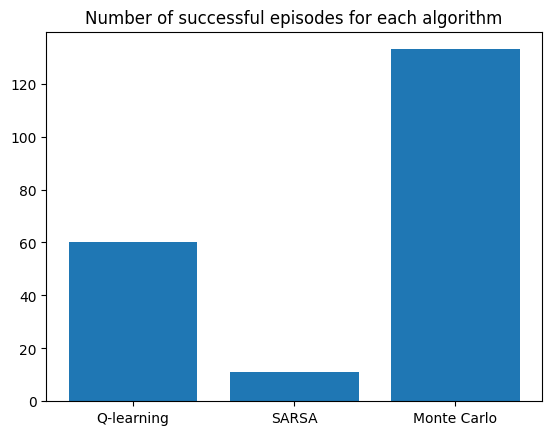

In [18]:
plt.title("Number of successful episodes for each algorithm")
plt.bar(["Q-learning", "SARSA", "Monte Carlo"], [len(data_clean[0]), len(data_clean[1]), len(data_clean[2])])

<BarContainer object of 4 artists>

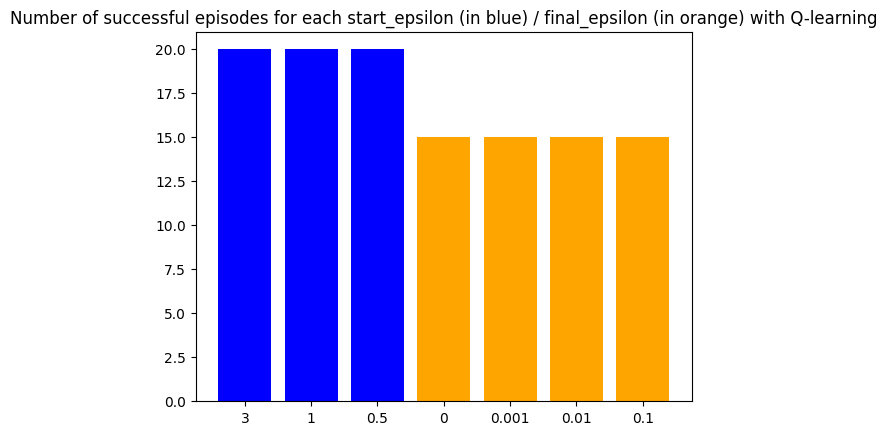

In [19]:
plt.title("Number of successful episodes for each start_epsilon (in blue) / final_epsilon (in orange) with Q-learning")
plt.bar(["3", "1", "0.5"], [len(data_clean_start_epsilon[0]), len(data_clean_start_epsilon1[0]), len(data_clean_start_epsilon2[0])], color="blue")
plt.bar(["0", "0.001", "0.01", "0.1"], [len(data_clean_final_epsilon[0]), len(data_clean_final_epsilon1[0]), len(data_clean_final_epsilon2[0]), len(data_clean_final_epsilon3[0])], color="orange")

<BarContainer object of 4 artists>

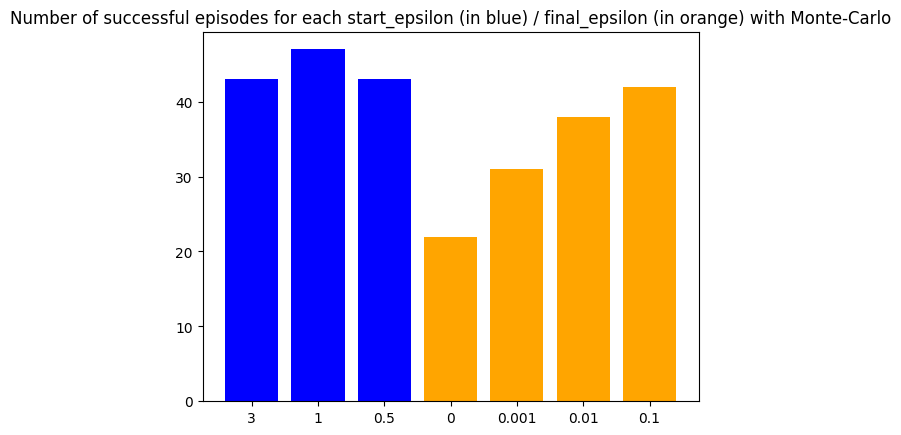

In [20]:
plt.title("Number of successful episodes for each start_epsilon (in blue) / final_epsilon (in orange) with Monte-Carlo")
plt.bar(["3", "1", "0.5"], [len(data_clean_start_epsilon[2]), len(data_clean_start_epsilon1[2]), len(data_clean_start_epsilon2[2])], color="blue")
plt.bar(["0", "0.001", "0.01", "0.1"], [len(data_clean_final_epsilon[2]), len(data_clean_final_epsilon1[2]), len(data_clean_final_epsilon2[2]), len(data_clean_final_epsilon3[2])], color="orange")

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


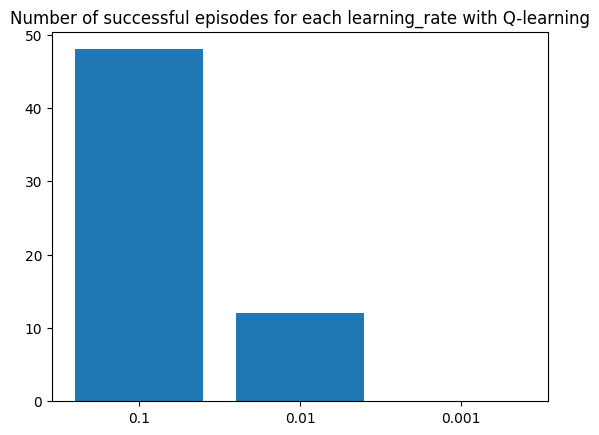

In [21]:
plt.title("Number of successful episodes for each learning_rate with Q-learning")
plt.bar(["0.1", "0.01", "0.001"], [len(data_clean_learning_rate[0]), len(data_clean_learning_rate1[0]), len(data_clean_learning_rate2[0])])
for i in range(len(data_clean_learning_rate1[0])):
    print(data_clean_learning_rate1[0][i]["epochs"])

Comme on avait pu voir précédemment, les résultats obtenus avec le leaning_rate 0.01 obtenus lors des entraînements de 50000 epochs ont de très bons scores.

/home/puigs/anaconda3/envs/valid/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/puigs/anaconda3/envs/valid/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/puigs/anaconda3/envs/valid/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


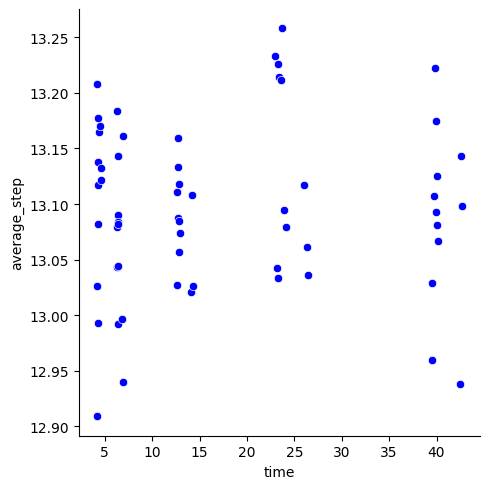

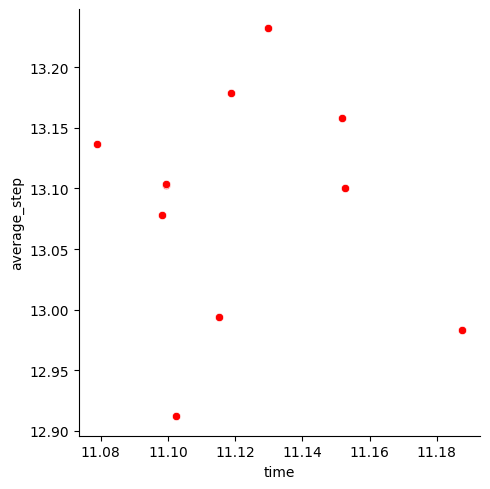

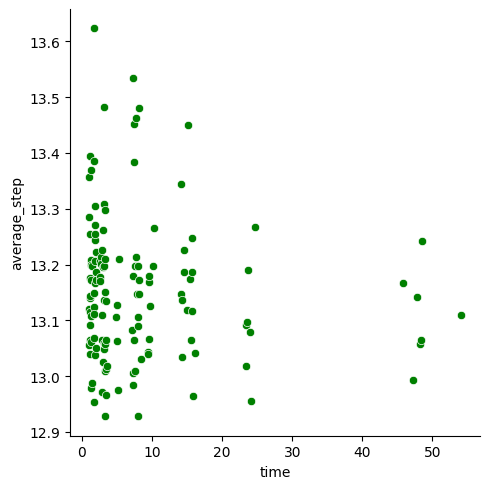

In [22]:
seaborn.relplot(pd.DataFrame(data_clean[0]), x = "time", y= "average_step", legend="brief", label="Q", color="blue")
seaborn.relplot(pd.DataFrame(data_clean[1]), x = "time", y= "average_step", legend="brief", label="Sarsa", color="red")
seaborn.relplot(pd.DataFrame(data_clean[2]), x = "time", y= "average_step", legend="brief", label="Monte Carlo", color="green")


# Comparaison de matrices généré avec le Q-learning avec les paramètres suivants
 * learning_rate = 0.1
 * start_epsilon = 1.0
 * final_epsilon = 0.1 et 0.01
 * epochs = 25000

In [24]:
import numpy as np
matrix_q_learning_0_1 = np.load("matrix_q_final_epsilon_0.1.npy")
matrix_q_learning_0_01 = np.load("matrix_q_final_epsilon_0.01.npy")

print(matrix_q_learning_0_1)
print(matrix_q_learning_0_01)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 2.7112507   3.38749006  2.68106739  3.45886373  5.20997639 -5.08688475]
 [ 7.62892884  9.00894115  7.2492503   9.31010889 10.9512375   0.26354389]
 ...
 [-0.97779739 12.2762531   1.15454115  0.91187289 -1.         -2.74528324]
 [-1.59866342 -1.87440524 -2.6120362   6.33248898 -2.985025   -2.985025  ]
 [ 4.28103072  1.05194033  1.47423161 17.9995399   1.61589399  1.18643111]]
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.34299693 -0.91238347 -0.95092182 -1.4583723   5.20997639 -3.9785223 ]
 [-1.15388172  1.81066728 -1.19964618  1.80494574 10.9512375  -2.90845975]
 ...
 [-1.35539761 -1.28240841 -1.35539761  3.09179826 -1.9189525  -1.995     ]
 [-2.52321699 -2.52176532 -2.53159808 -1.58949365 -2.8999525  -2.8999525 ]
 [-0.28905    -0.2805     -0.2985025  12.2663666  -1.         -1.        ]]


Les matrices sont différents mais produisent de bons résultats.

Aujourd'hui, mes connaissances ne me permet pas d'utiliser la comparaison de matrice comme élément d'analyse.

# Convergence

L'intégration de la convergence à nos entraînement auraient permis de réduire considérablement le temps d'entraînement de nos algorithmes.

Nous avions décidé de nous passer de la convergence car nos entraînement étaient rapides, malheureusement nous avions sous-estimé la durée du lancement de notre benchmark, qui dépasser les 24h (avant changement de l'algorithme du Monte-carlo que nous trouvions extremement long et qui a donc était remplacé)

# Conclusion

Au début de ce projet, nous pensions que le Q-learning allait être l'algorithme qui aurait des meilleurs scores.

En effet, le Q-learning a de bon score, notamment avec le learning_rate a 0.1 comme on avait pu voir des les graphiques précédent.

Cependant, l'algorithme monte-carlo a obtenu, plus de bons résultats et avec un temps d'entraînement plus court.
Si nous regardons les 5 meilleurs résultats obtenus tout algorithme confondu trier par temps cela donne : 


In [41]:
best = list((data_clean[0] + data_clean[1] + data_clean[2]))
best.sort(key=lambda x: x["time"])
for i in range(5):
    print(best[i])
    print("-----")

{'algo': 'monte_carlo', 'learning_rate': 0.1, 'epochs': 2500, 'start_epsilon': 0.5, 'final_epsilon': 0.001, 'average_step': 13.285, 'min_step': 6, 'max_step': 18, 'time': 0.9692554473876953}
-----
{'algo': 'monte_carlo', 'learning_rate': 0.01, 'epochs': 2500, 'start_epsilon': 0.5, 'final_epsilon': 0, 'average_step': 13.055, 'min_step': 6, 'max_step': 18, 'time': 1.0093495845794678}
-----
{'algo': 'monte_carlo', 'learning_rate': 0.1, 'epochs': 2500, 'start_epsilon': 1.0, 'final_epsilon': 0.001, 'average_step': 13.121, 'min_step': 6, 'max_step': 18, 'time': 1.0309276580810547}
-----
{'algo': 'monte_carlo', 'learning_rate': 0.01, 'epochs': 2500, 'start_epsilon': 1.0, 'final_epsilon': 0.01, 'average_step': 13.356, 'min_step': 6, 'max_step': 18, 'time': 1.0599291324615479}
-----
{'algo': 'monte_carlo', 'learning_rate': 0.001, 'epochs': 2500, 'start_epsilon': 1.0, 'final_epsilon': 0, 'average_step': 13.092, 'min_step': 6, 'max_step': 18, 'time': 1.0725219249725342}
-----


Nous pouvons remarquer que c'est le Monte-carlo qui revient constamment, de plus c'est l'epoch 2500 qui revient aussi constamment.